#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = housing_prices.std()

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

RM - Average Number of rooms, generally a a measure of how big the house is.

PTRATIO - Pupil-teacher ratio by tow school district. Lower ration should impy better more individual student attention.

NOX - The amount of Nitric Oxide in parts per 10 million in the zone, one of the measures of how polluted the zone is.


##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

RM = 5.609

NOX = 0.659

PTRATIO = 20.2

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [4]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.70,test_size=0.30,random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer**

The objective of this project is to build a model to predict Boston housing prices. Any predictive model that one builds with a dataset must be able to generalize well i.e. the model must be able to make accurate,reliable and credible predictions on new data. However, one must have a way to assess the model's predictions. Since one cannot get access to future data for assessing the model, reserving some of our currently availabe data and treating it as if it were data from the future would serve as a good simulation to test our model.

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [5]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true,y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **

This project is about the prediction of housing prices and is most certainly a problem of regression. i.e. we intend to build a model that can successfully predict the value of a continuous variable viz. housing_prices, given the CLIENT_FEATURES. Regression Models are assessed by measuring the error between the observed values and the predicted. Although the measures of this error vary all regression models must have the small and unbaised error.
Among these measures of error the Mean Squared Error(RMSE) has certain properties that can be leveraged for the purpose of this project.

These include:
1. MSE is an absolute measure of fit and not a relative measure.
2. MSE is in square units of the response variable.
3. MSE penalizes and amplifies larger errors more than small errors.

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [6]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # Set up the parameters we wish to tune
    parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric,greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters,scoring=scoring_function,n_jobs=4)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

Any predictive model built has a set of hyperparameters(the constants, ex. max_depth, max_nodes etc) that results in the best scoring metric acheivable by the predictor given a set of training parameters. Since, the optimal set of hyperparameters is a subset of the cross-product of all the hyperparameter sets, manually finding the optimal hyperparameters can be time-consuming, tedious and is often an iterative process.

The Grid Search algorithm solves the above complication  by forming a grid of hyperparameter sets with each point in the grid representing a unique subset of the cross product. The algorithm takes the following inputs; a predictor instance, the sets of various hyperparameters, a scoring metric. Using these inputs the algorithm exhaustively searches for the set of optimal hyperparametes in the grid by applying the hyperparameter set at each point to the predictor instance and measuring the scoring metric. This ensures that we have a predictor that is tuned to use the optimal set of parameters in ur desired set of hyper parameters.

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

As discussed in the test-train split section, when building predictive models one splits the given dataset into training and testing subsets to validate the models predictions. This leads to the following dilemma:

While one one hand, we wish to maximize the training dataset to build a predictive model that best suits the given data on the other, we wish to maximize the testing dataset to better assert the performance of the model. We are  thus forced to compromise on the size of either and chose an optimal split between the training and the testing dataset. How do we maximize the training and the testing samples such that we are able to maximize both the testing and the training dataset? This is where cross-validation help us. The technique involves making multiple splits in the dataset such that we are able to test with all the data and train with all the data. This helps us accurately measure the performance of the model using the existing dataset while still not compromising on the training dataset.

Since, finding the hyperparameter set by using a reliable and accurate performance metric is desirable and advantageous. Cross-validation is particularly helpful when using grid search.

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

/home/bharat/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bharat/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/bharat/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


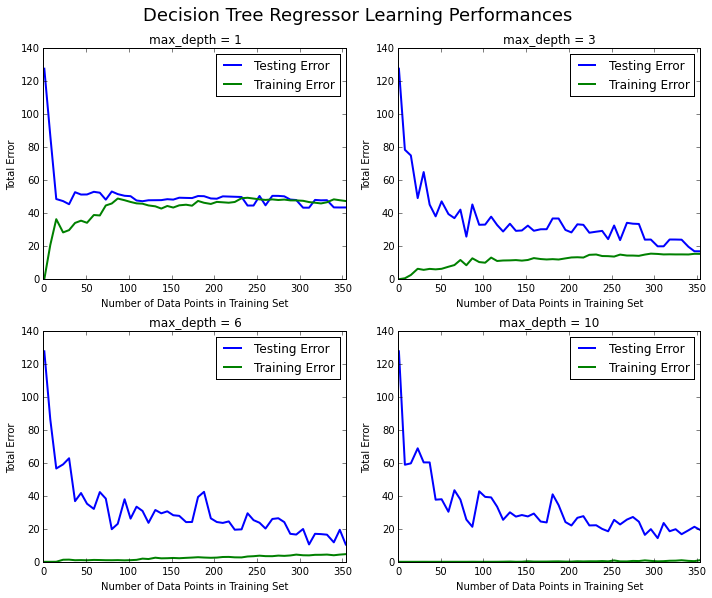

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

The max depth of the model is 6. As the size of the training set increases the the training error tends to increase ever so gradually while the testing error initially decreases drastically and then decrease is more gradual.

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

Looking at the model with max depth 1 it is observable that as the training size increases the training error increases rapidly so much as to overlap with the decreasing testing error. This is clear evidence of high bias. The shallow depth in the model seems insufficient and is an oversimplification The predictor is unable to learn the relationships that exist within the training data. 

On the other hand, the model with a max depth of 10 is able to understand the relationships in the training set completely, so much so that there is little or no training error. In this case he testing error is low. However, the model is still mostly similar to a model with max depth of 6. There are exists a higher complexity in the model that doesn't seem to affect the results. Occam's razor, a problem-solving principle, states that among competing hypotheses the one with the fewest assumptions must be selected. This can thus be considered an example of high variance since the model is doing a good job on the training set by overfitting but is performing bad by not being simple in it's predictions on the testing set and not generalizing very well.

Creating a model complexity graph. . . 


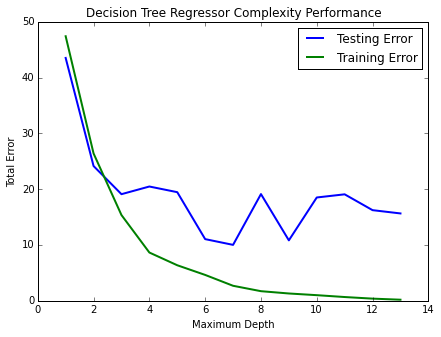

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

From the above graph the following seems evident,

1: At lower max depth( i.e max depth < 4) the testing and training error decreases. At these max depths the hypotheses function approximated by our predictor is quite simple(smaller degree polynomial) and doesn't fully capture the underlying relationships in the input variables. This is a classic example of high bias where, the predictor is unable to make good predictions due to the fact that it generalizes a little too much.

2: At higher max depths( i.e max depth > 8) the training error decreases while the testing error increases. Here it seems that the hypotheses function approximated by our predictor is quite complex(higher degree polynomial) and completely fits the training data. Perhaps, a little too well. So much so that, the predictor is unable to generalize and make good predictions on data it's not yet seen (testing data). This is an example of high variance in the predictor.

It's quite clear that choosing too low a value leaves us with high bias while too high a value introduces high variance. Our aim all along has been to build a model that makes good predictions. We must consider a model that approximates a hypothesis function that is relatively simple but still captures the underlying relationships in the training data. A compromise between the high bias and high variance models perhaps.

After multiple trials with the dataset it's believed that the good choice of max depth lies between 5 and 6. Choosing the simplest model leaves us with max depth 5, which is believed to achieve a good generalization while still capturing the underlying relationships among the training variables.

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [11]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 5}


**Answer: **

Using grid search the optimal max_depth parameter for the predictor is 5. This is congruent with our estimation of the max depth from the graph above and confirms our belief in occam's razor. 

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [12]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.968


**Answer: **

The predicted value of the client's home given the client features is $20968. This is within the inter quartile range of the dataset. It's also within 1 standard deviation from the mean. This leads us to believe that the predicted value is not an extreamity . The client features correspond to near average housing price in boston.

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

In [13]:
print performance_metric(y_test,reg.predict(X_test))

5.89411213327


**Answer: **
The model's predicted price is quite close to the actual value. Although this is a relatively good model for predictions we must recommend the following while using the model:

1. The data is relatively old (1993), any predictions made with this dataset for future results must scale the prices accordingly. We must consider using newer data to train the model if we intend to use the model for making predictions for future. 

2. With only about 500 data points and thirteen features(high dimensionality), the dataset is relatively small for the large number of dimensions. The predictive model can do much better given more data or fewer dimensions capturing the relative trends in the data.

3. The DecisionTreeRegressor is a relatively simple and computationally cheap predictor. Fitting a good model with a single tree is quite difficult because it is fit using a greedy heuristic that may not be optimal. An ensemble of fitted models may be used to make a better predictor.
